# Business questions
- Who's most likely to open a credit account?
- what kind of transactions are those with credit cards doing?


In [2]:
import pandas as pd
import numpy as np
import  matplotlib.pyplot  as plt

In [324]:
users = pd.read_csv('chime_ds_interview_data/users.csv')
users.head()


,ID,SPENDING_ACCOUNT_OPENED_DATE,CREDIT_OPENED_DATE,HAS_SAVINGS_ACCOUNT,TRAFFIC_SOURCE,KYC_SCORE,DISPUTE_CLAIMS_COUNT
0,3,2019-04-09,NaN,1,paid,0.01,0
1,183,2019-10-21,2020-09-09,1,organic,0.01,0
2,1666,2020-05-23,2020-09-05,1,paid,0.01,0
3,1914,2020-07-30,NaN,1,organic,0.00,0
4,2863,2019-09-17,NaN,0,paid,0.03,0


### check nulls

In [20]:
for a in users.columns.tolist():
    print(users[a].isnull().value_counts())

False    186
Name: ID, dtype: int64
False    186
Name: SPENDING_ACCOUNT_OPENED_DATE, dtype: int64
False    98
True     88
Name: CREDIT_OPENED_DATE, dtype: int64
False    186
Name: HAS_SAVINGS_ACCOUNT, dtype: int64
False    184
True       2
Name: TRAFFIC_SOURCE, dtype: int64
False    156
True      30
Name: KYC_SCORE, dtype: int64
False    186
Name: DISPUTE_CLAIMS_COUNT, dtype: int64


In [328]:
# extract time information
users['SPENDING_ACCOUNT_OPENED_DATE'] = pd.DatetimeIndex(users['SPENDING_ACCOUNT_OPENED_DATE'])
users['CREDIT_OPENED_DATE'] = pd.DatetimeIndex(users['CREDIT_OPENED_DATE'])
users['CREDIT_OPENED_DATE_month'] = pd.DatetimeIndex(users['CREDIT_OPENED_DATE']).month
users['open_credit'] = users['CREDIT_OPENED_DATE'].notna()

In [198]:
users['SPENDING_ACCOUNT_OPENED_DATE'].min(),users['SPENDING_ACCOUNT_OPENED_DATE'].max()

(Timestamp('2016-01-19 00:00:00'), Timestamp('2020-08-30 00:00:00'))

<AxesSubplot:xlabel='CREDIT_OPENED_DATE_month'>

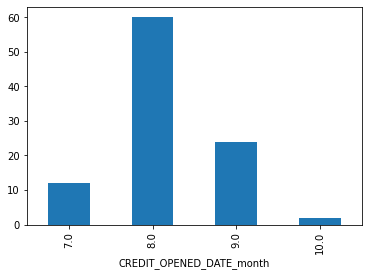

In [39]:
# most accounts were opened in august
users.groupby(['CREDIT_OPENED_DATE_month']).size().plot(kind = 'bar')

In [10]:
# time window
users['CREDIT_OPENED_DATE'].min(),users['CREDIT_OPENED_DATE'].max()

(Timestamp('2020-07-23 00:00:00'), Timestamp('2020-10-11 00:00:00'))

In [118]:
# those with credit card opens seem to have lower kyc scores
users.groupby(['open_credit'])['KYC_SCORE'].describe()

,count,mean,std,min,25%,50%,75%,max
open_credit,,,,,,,,
False,79.0,0.049873,0.062460,0.0,0.01,0.02,0.06,0.28
True,77.0,0.024286,0.021486,0.0,0.01,0.02,0.03,0.12


open_credit
False    AxesSubplot(0.125,0.125;0.775x0.755)
True     AxesSubplot(0.125,0.125;0.775x0.755)
Name: KYC_SCORE, dtype: object

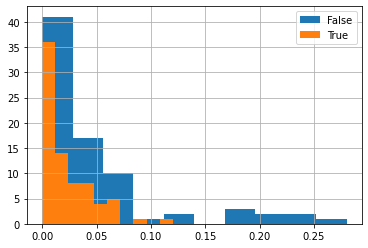

In [128]:
users.groupby(['open_credit'])['KYC_SCORE'].hist(legend = True)

<AxesSubplot:xlabel='open_credit'>

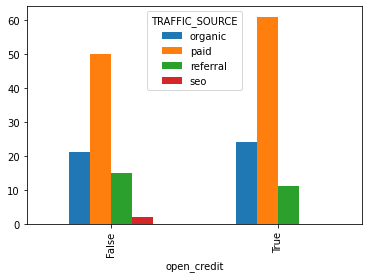

In [43]:
users.groupby(['open_credit','TRAFFIC_SOURCE']).size().unstack(level=1).plot.bar()

<AxesSubplot:xlabel='open_credit'>

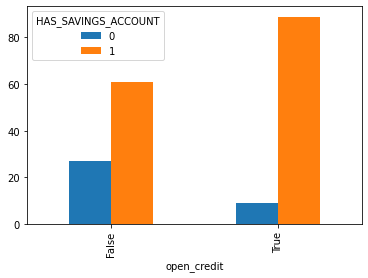

In [44]:
# everyone with open credit has a savings accounts
users.groupby(['open_credit','HAS_SAVINGS_ACCOUNT']).size().unstack(level=1).plot.bar()

In [347]:

users.groupby(['open_credit','DISPUTE_CLAIMS_COUNT']).size()

open_credit  DISPUTE_CLAIMS_COUNT
False        0                       85
             1                        3
True         0                       95
             1                        2
             3                        1
dtype: int64

# app events

In [32]:
app_events = pd.read_csv('chime_ds_interview_data/app_events.csv')
app_events['TIMESTAMP'] = pd.DatetimeIndex(app_events['TIMESTAMP'])
app_events['app_month'] = pd.DatetimeIndex(app_events['TIMESTAMP']).month
print(app_events.shape)
app_events.head()


(19084, 4)


,ID,SCREEN,TIMESTAMP,app_month
0,3,Home,2020-07-18 22:05:48,7
1,3,Home,2020-07-21 18:25:03,7
2,3,Home,2020-07-21 18:52:39,7
3,3,Home,2020-07-24 23:09:14,7
4,3,Settings,2020-07-26 06:43:19,7


In [161]:
app_events['TIMESTAMP'].min(),app_events['TIMESTAMP'].max()

(Timestamp('2020-06-07 05:27:14'), Timestamp('2020-10-19 05:36:27'))

In [31]:
# most people spend time on the home page
app_events.groupby(['SCREEN'])['ID'].count()

SCREEN
Home        15705
Offers         98
Settings     3281
Name: ID, dtype: int64

### most people are on the home page
- looks there's some kind marketing push in august and july

<AxesSubplot:xlabel='app_month'>

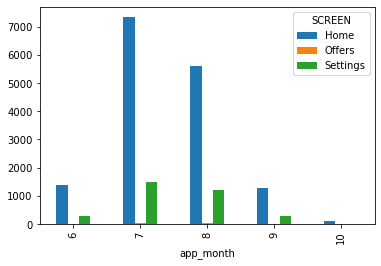

In [45]:
app_events.groupby(['app_month','SCREEN']).size().unstack(level=1).plot.bar()

# invites

In [360]:
invites = pd.read_csv('chime_ds_interview_data/invites.csv')
invites['INVITE_DATE'] = pd.to_datetime(invites['INVITE_DATE'])
invites['invite_month'] = pd.DatetimeIndex(invites['INVITE_DATE']).month
invites['in_date'] = pd.DatetimeIndex(invites['INVITE_DATE']).date


In [53]:
invites.head()

,ID,INVITE_DATE,CREDIT_INELIGIBLE,invite_month
0,3,2020-08-24 08:00:39,1,8
1,183,2020-08-17 08:00:24,0,8
2,1666,2020-09-05 08:00:25,0,9
3,1914,2020-08-20 08:40:47,1,8
4,2863,2020-09-03 08:00:44,0,9


In [59]:
# checking for multiple invites
len(set(invites['ID'].tolist()))

186

In [54]:
# it looks like there was some kind of marketing push in july to september
invites['INVITE_DATE'].min(),invites['INVITE_DATE'].max()

(Timestamp('2020-07-17 08:28:48'), Timestamp('2020-09-17 08:00:20'))

<AxesSubplot:xlabel='invite_date'>

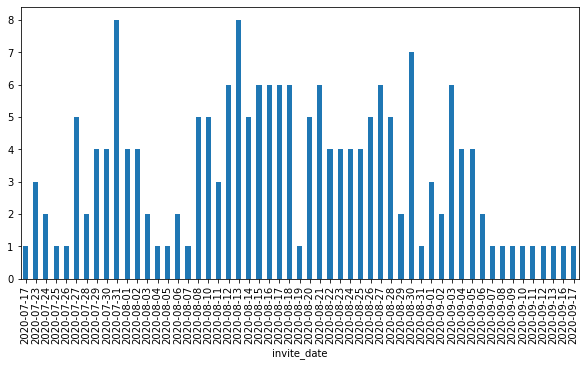

In [75]:
invites.groupby('invite_date').size().plot.bar(figsize=(10,5))

In [68]:
invites.groupby('invite_month').size()

invite_month
7     31
8    125
9     30
dtype: int64

## looks like no credit account was opened before earliest invite date

In [77]:
users[users['CREDIT_OPENED_DATE'] < '2020-07-17'].shape

(0, 9)

In [333]:
transactions = pd.read_csv('chime_ds_interview_data/transactions.csv')


In [329]:
app_users = users.set_index('ID').join(app_events.set_index('ID'),how='left')\
                                    .join(transactions.set_index('ID'),how='left')
trans_users = users.set_index('ID').join(transactions.set_index('ID'),how='left')

In [330]:
trans_users.groupby(['open_credit','TRANSACTION_TYPE'])['TRANSACTION_AMOUNT'].describe()


count        mean         std   min      25%  \
open_credit TRANSACTION_TYPE                                                  
False       atm                378.0  160.109101  139.301541  5.05  49.0600   
            deposit           2505.0  103.389637  295.547033  0.01   0.4500   
            purchase          3820.0   38.625639  110.554238  0.01   6.7075   
True        atm                600.0  158.415583  170.928935  9.04  45.7075   
            deposit           5521.0  123.902985  520.866618  0.01   0.4300   
            purchase          7929.0   38.837126  125.485506  0.01   6.7100   

                                  50%       75%       max  
open_credit TRANSACTION_TYPE                               
False       atm               106.740  219.0600    802.39  
            deposit             5.070   72.6100   6741.89  
            purchase           12.755   29.8200   3817.80  
True        atm                98.780  203.4025   1004.00  
            deposit             0.930   67.9500  11198.88  
            purchase           14.330   31.3700   7588.00

<AxesSubplot:xlabel='open_credit'>

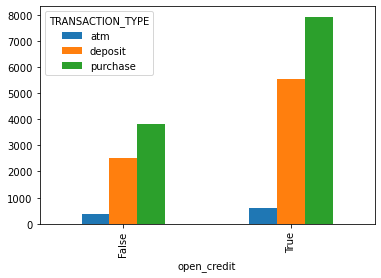

In [331]:
# credit account owners have more activity
trans_users.groupby(['open_credit','TRANSACTION_TYPE']).size().unstack(level=1).plot(kind = 'bar')


<AxesSubplot:xlabel='open_credit'>

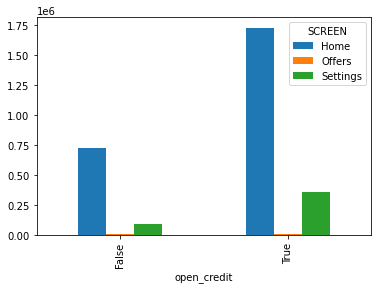

In [332]:
# credit card owners have more app activity
app_users.groupby(['open_credit','SCREEN']).size().unstack(level=1).plot(kind = 'bar')

# transaction wrangling

In [366]:
# change time string to datatime
# extract time information
transactions['TRANS_TS'] = pd.to_datetime(transactions['TRANS_TS'])
transactions['month'] = pd.DatetimeIndex(transactions['TRANS_TS']).month
transactions['week'] = pd.DatetimeIndex(transactions['TRANS_TS']).week
transactions['ts_date'] = pd.DatetimeIndex(transactions['TRANS_TS']).date


/Users/dami.osoba/opt/anaconda3/envs/tf/lib/python3.7/site-packages/ipykernel_launcher.py:5: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series.  To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  """


In [62]:
transactions.head()

,ID,TRANSACTION_TYPE,TRANSACTION_AMOUNT,TRANS_TS,month,week
0,3,deposit,2.67,2020-07-22 01:53:21,7,30
1,183,deposit,0.11,2020-07-08 08:30:17,7,28
2,183,purchase,27.92,2020-07-08 09:02:19,7,28
3,183,purchase,17.49,2020-07-08 09:03:59,7,28
4,183,purchase,40.84,2020-07-08 21:00:56,7,28


## mostly purchases by counts,  deposits  by dollar value 
- not sure if this is atm deposit or withdrawals

In [63]:

transactions.groupby('TRANSACTION_TYPE').agg({'TRANSACTION_AMOUNT' : ['count', 'max','mean','median']})

TRANSACTION_AMOUNT                              
                              count       max        mean  median
TRANSACTION_TYPE                                                 
atm                             978   1004.00  159.070133  102.50
deposit                        8026  11198.88  117.500551    0.98
purchase                      11749   7588.00   38.768364   13.88

In [110]:
transactions['month'].value_counts()

7     9467
8     7547
9     1810
6     1718
10     211
Name: month, dtype: int64

# Want to create model that calculates likelihood to convert in the next month
- biggest push of invites was in aug.
- create propensity score model that predicts conversions in august given activity in july
- basic transaction statistics for july, and app events for july to predict for august
- the score will tell how likely someone will convert
- score model to minimize false positives
- baseline model

In [80]:
past = '2020-07-31'
future = '2020-08-01'

### get eligible users
- users who opened credit accounts after past or users with null credit account fields
- remove users who open spending accounts after past

In [359]:
user_invites = users.merge(invites, on= ['ID'])
eligible_users = user_invites[(user_invites['CREDIT_OPENED_DATE'] > past) | 
                              user_invites['CREDIT_OPENED_DATE'].isna()] 
eligible_users = eligible_users[eligible_users['SPENDING_ACCOUNT_OPENED_DATE'] <=past]

 

In [364]:
transactions.dtypes

ID                             int64
TRANSACTION_TYPE              object
TRANSACTION_AMOUNT           float64
TRANS_TS              datetime64[ns]
month                          int64
week                           int64
dtype: object

In [ ]:
# for those who were invited, how l

In [376]:
# try a different way of structuring the data
invites_merge = user_invites.merge(transactions,left_on = ['ID'],right_on=['ID'],how='outer')
trans_before_invite = invites_merge[invites_merge['in_date'] >= invites_merge['ts_date']]

###  additional user features
- add invite boolean field
- get time since open spending account

In [338]:
eligible_users['invite_date_within_window'] = (eligible_users['INVITE_DATE'] <= past).values

today = pd.to_datetime(past)
eligible_users['time_since_open_spend'] = (today - eligible_users['SPENDING_ACCOUNT_OPENED_DATE'])

### get transactions for the past month

In [305]:
from dateutil.relativedelta import relativedelta
beg_trans_date = pd.to_datetime(past) + relativedelta(months= -1)+ relativedelta(days=1))
past_trans = transactions[(transactions['TRANS_TS']<=past) & (transactions['TRANS_TS']>beg_trans_date) ]

In [308]:
# get basic trasaction statistics for transaction type
trans_type_grouped = past_trans.groupby(['ID','TRANSACTION_TYPE']).agg({'TRANSACTION_AMOUNT' : ['count', 'max','mean','median']})\
                        .unstack().reset_index().fillna(0)
cols = ["_".join([str(b) for b in a]) for a in trans_type_grouped.columns.tolist()]
cols[0] = 'ID'
trans_type_grouped.columns = cols
trans_type_grouped.head()

,ID,TRANSACTION_AMOUNT_count_atm,TRANSACTION_AMOUNT_count_deposit,TRANSACTION_AMOUNT_count_purchase,TRANSACTION_AMOUNT_max_atm,TRANSACTION_AMOUNT_max_deposit,TRANSACTION_AMOUNT_max_purchase,TRANSACTION_AMOUNT_mean_atm,TRANSACTION_AMOUNT_mean_deposit,TRANSACTION_AMOUNT_mean_purchase,TRANSACTION_AMOUNT_median_atm,TRANSACTION_AMOUNT_median_deposit,TRANSACTION_AMOUNT_median_purchase
0,3,0.0,1.0,0.0,0.00,2.67,0.00,0.000000,2.670000,0.000000,0.00,2.67,0.000
1,183,6.0,59.0,68.0,241.78,3166.86,1215.12,145.291667,138.753898,65.652500,152.14,0.76,24.900
2,1666,0.0,0.0,6.0,0.00,0.00,30.60,0.000000,0.000000,13.578333,0.00,0.00,11.360
3,2863,5.0,7.0,8.0,86.65,626.40,574.20,58.882000,158.981429,100.576250,51.16,78.30,36.985
4,3124,3.0,5.0,75.0,458.00,832.82,149.97,287.013333,439.686000,17.795067,329.76,637.00,5.230


In [309]:
# get basic trasaction statistics by transaction amount
trans_amt_grouped = past_trans.groupby(['ID','month']).agg({'TRANSACTION_AMOUNT' : ['count', 'max','mean','median']})\
                        .unstack().reset_index().fillna(0)
cols = ["_".join([str(b) for b in a]) for a in trans_amt_grouped.columns.tolist()]
cols[0] = 'ID'
trans_amt_grouped.columns = cols
trans_amt_grouped.head()

,ID,TRANSACTION_AMOUNT_count_7,TRANSACTION_AMOUNT_max_7,TRANSACTION_AMOUNT_mean_7,TRANSACTION_AMOUNT_median_7
0,3,1,2.67,2.670000,2.67
1,183,133,3166.86,101.673684,17.49
2,1666,6,30.60,13.578333,11.36
3,2863,20,626.40,110.594500,50.24
4,3124,83,832.82,52.940964,6.27


In [310]:
past_events = app_events[app_events['TIMESTAMP'] <=past]
past_events.shape, app_events.shape

((10270, 4), (19084, 4))

In [311]:
grouped_events = past_events.groupby(['ID','SCREEN']).agg({'TIMESTAMP' : ['count', 'max']}).unstack().reset_index()
cols = ["_".join([str(b) for b in a]) for a in grouped_events.columns.tolist()]
cols[0] = 'ID'
grouped_events.columns = cols
grouped_events

,ID,TIMESTAMP_count_Home,TIMESTAMP_count_Offers,TIMESTAMP_count_Settings,TIMESTAMP_max_Home,TIMESTAMP_max_Offers,TIMESTAMP_max_Settings
0,3,6.0,NaN,2.0,2020-07-30 18:29:15,NaT,2020-07-26 06:43:51
1,183,51.0,NaN,6.0,2020-07-30 14:37:05,NaT,2020-07-22 13:11:44
2,1666,1.0,NaN,NaN,2020-07-27 15:39:17,NaT,NaT
3,1914,3.0,NaN,NaN,2020-07-30 16:14:40,NaT,NaT
4,2863,15.0,NaN,2.0,2020-07-30 22:19:47,NaT,2020-07-29 00:01:47
...,...,...,...,...,...,...,...
168,97177,21.0,NaN,4.0,2020-07-02 07:37:18,NaT,2020-07-01 16:06:45
169,99012,119.0,NaN,36.0,2020-07-30 06:21:04,NaT,2020-07-25 13:08:00
170,99022,17.0,NaN,5.0,2020-07-30 08:53:22,NaT,2020-07-30 09:50:33
171,99038,18.0,1.0,1.0,2020-07-28 17:28:57,2020-07-16 14:44:21,2020-07-16 14:46:34


In [312]:
# calculate time since last event
today = pd.to_datetime(past)
grouped_events['time_since_last_home_time'] = (today - grouped_events['TIMESTAMP_max_Home']).astype('timedelta64[h]')
grouped_events['time_since_last_offers_time'] = (today - grouped_events['TIMESTAMP_max_Offers']).astype('timedelta64[h]')
grouped_events['time_since_last_settings_time'] = (today - grouped_events['TIMESTAMP_max_Settings']).astype('timedelta64[h]')

In [313]:
usable_cols = ['ID', 'TIMESTAMP_count_Home', 'TIMESTAMP_count_Offers',
       'TIMESTAMP_count_Settings','time_since_last_home_time', 'time_since_last_offers_time',
       'time_since_last_settings_time']
transaction_columns = trans_type_grouped.columns.tolist()[1:] + trans_amt_grouped.columns.tolist()[1:]

# create training dataset
- ambiguity about the data setup because most of the invites are given in august

In [339]:
final = eligible_users.merge(trans_type_grouped,on=['ID'],how='left')\
              .merge(trans_amt_grouped,on=['ID'],how='left')\
              .merge(grouped_events[usable_cols],on=['ID'],how='left')\
#fill the nulls times with max` time
final[['time_since_last_home_time', 'time_since_last_offers_time',
       'time_since_last_settings_time']] = final[['time_since_last_home_time', 'time_since_last_offers_time',
       'time_since_last_settings_time']].fillna(1500)

final[['TIMESTAMP_count_Home', 'TIMESTAMP_count_Offers',
       'TIMESTAMP_count_Settings']] = final[['TIMESTAMP_count_Home', 'TIMESTAMP_count_Offers',
       'TIMESTAMP_count_Settings']].fillna(0)
final[transaction_columns] = final[transaction_columns].fillna(0)


# get label

In [351]:

end_future_date = pd.to_datetime(future) + relativedelta(months= 1)
final['target'] = ((final['CREDIT_OPENED_DATE'] >= future) & (final['CREDIT_OPENED_DATE'] <= end_future_date)).astype('int')

In [323]:
final['target'].value_counts()

0    106
1     64
Name: target, dtype: int64

In [356]:
final.groupby(['target']).mean()

,ID,HAS_SAVINGS_ACCOUNT,KYC_SCORE,DISPUTE_CLAIMS_COUNT,CREDIT_OPENED_DATE_month,open_credit,CREDIT_INELIGIBLE,invite_month,invite_date_within_window,TRANSACTION_AMOUNT_count_atm,...,TRANSACTION_AMOUNT_count_7,TRANSACTION_AMOUNT_max_7,TRANSACTION_AMOUNT_mean_7,TRANSACTION_AMOUNT_median_7,TIMESTAMP_count_Home,TIMESTAMP_count_Offers,TIMESTAMP_count_Settings,time_since_last_home_time,time_since_last_offers_time,time_since_last_settings_time
target,,,,,,,,,,,,,,,,,,,,,
0,51169.433962,0.764151,0.048191,0.028302,9.090909,0.207547,0.481132,8.150943,0.084906,1.830189,...,34.056604,647.539906,61.295556,16.377547,34.811321,0.273585,5.735849,194.962264,1332.245283,641.075472
1,52705.984375,0.890625,0.021042,0.078125,8.062500,1.000000,0.000000,7.906250,0.046875,2.781250,...,69.515625,1015.244531,86.722836,18.518750,48.468750,0.343750,10.578125,81.562500,1252.125000,278.703125


In [ ]:
final.groupby(['target','invite_date_within_window']).size().unstack(level=1).plot.bar()

In [ ]:
from sklearn.preprocessing import StandardScaler, KBinsDiscretizer,FunctionTransformer, OneHotEncoder,LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import make_pipeline
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, f1_score,classification_report,confusion_matrix,precision_recall_curve
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV,train_test_split, cross_val_score,RepeatedStratifiedKFold


In [ ]:

training_feats = ['KYC_SCORE','invite_date_within_window', 'time_since_open_spend',
         'TRANSACTION_AMOUNT_count_7',
       'TRANSACTION_AMOUNT_max_7', 'TRANSACTION_AMOUNT_mean_7',
       'TRANSACTION_AMOUNT_median_7', 'TIMESTAMP_count_Home',
       'TIMESTAMP_count_Offers', 'TIMESTAMP_count_Settings',
       'time_since_last_home_time', 'time_since_last_offers_time',
       'time_since_last_settings_time']

X_train, X_test, y_train, y_test = train_test_split(final,final['target'],
                                                    train_size=0.7, test_size=0.3, random_state=698)



linear_model_preprocessor = ColumnTransformer(
    [("whiten",StandardScaler(),training_feats)],
    remainder="drop",)

clf = LogisticRegression()
lm_model_pipe = make_pipeline(linear_model_preprocessor,clf)
